# **Question # 01**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### **1_ Load the dataset**

In [3]:
df = pd.DataFrame(pd.read_csv("Mall_Customers.csv"))

In [4]:
df["Gender"] = df["Gender"].replace({'Male':1,'Female':0})

#### **2_ Clean the data by removing any duplicates, and missing values.**

In [5]:
df = df.drop_duplicates()
for column in df.columns:
    df[column] = df[column].replace(np.nan,df[column].mean)

#### **3_ Normalization of the Data**

In [6]:
normalize =  lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].apply(normalize)
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


#### **Standardization of data**

In [7]:
scaler = StandardScaler()
features= scaler.fit_transform(df.drop(columns=["CustomerID"]))
features

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [8]:
features = df.drop(columns=["CustomerID"]) 
features

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0,0.326923,0.860656,0.795918
196,0,0.519231,0.909836,0.275510
197,1,0.269231,0.909836,0.744898
198,1,0.269231,1.000000,0.173469


#### **3_ Clustering**

In [9]:
kmeans = KMeans(3,random_state=0,n_init='auto')
kmeans.fit(features)

identify_features = kmeans.fit_predict(features)
identify_features


array([0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0,
       0, 0], dtype=int32)

In [10]:
data_with_clusters = df.copy()
data_with_clusters["Clusters"] = identify_features

data_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,0.019231,0.000000,0.387755,0
1,2,1,0.057692,0.000000,0.816327,0
2,3,0,0.038462,0.008197,0.051020,2
3,4,0,0.096154,0.008197,0.775510,1
4,5,0,0.250000,0.016393,0.397959,1
...,...,...,...,...,...,...
195,196,0,0.326923,0.860656,0.795918,1
196,197,0,0.519231,0.909836,0.275510,2
197,198,1,0.269231,0.909836,0.744898,0
198,199,1,0.269231,1.000000,0.173469,0


#### **Showing Graph**

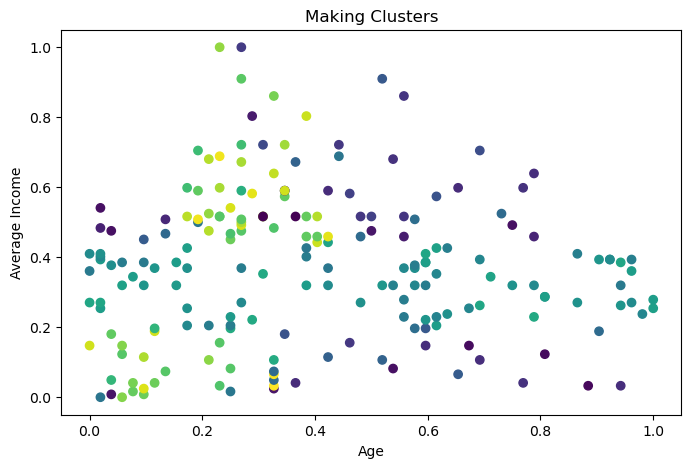

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(data_with_clusters["Age"],data_with_clusters["Annual Income (k$)"],c=data_with_clusters["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Average Income")
plt.title("Making Clusters")
plt.show()

# **Question # 02**

#### **Optimal number of clusters**

In [12]:
sse = []
number_clusters = range(1, 11)
for i in number_clusters:
    kmeans = KMeans(i,n_init=10,random_state=0)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

sse

[86.68148216035944,
 37.27227241211876,
 29.552857611943853,
 22.390960011928556,
 19.076637882722967,
 16.429467944699958,
 14.225217482045638,
 12.22351850202536,
 10.60043296955085,
 9.399802915576307]

#### **Plot the Graph**

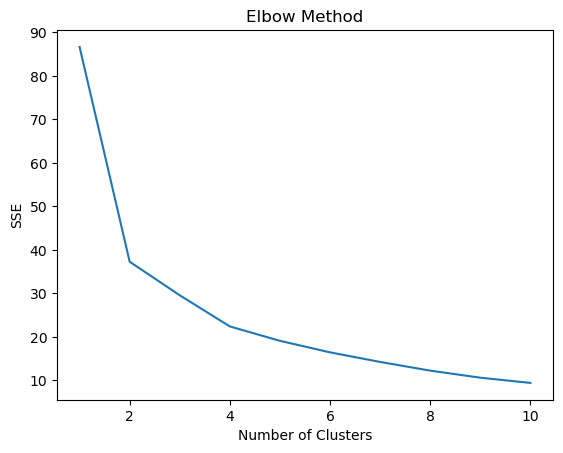

In [13]:
plt.plot(number_clusters, sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

#### **Predict the labels of the features**

In [14]:
kmeans.fit(features)
labels = kmeans.fit_predict(features)

In [15]:
labels

array([3, 3, 7, 0, 7, 0, 7, 0, 1, 0, 1, 0, 7, 0, 1, 3, 7, 3, 1, 0, 3, 3,
       7, 3, 7, 3, 7, 3, 7, 0, 1, 0, 1, 3, 7, 0, 7, 0, 7, 0, 2, 3, 1, 8,
       7, 0, 2, 8, 8, 8, 2, 3, 8, 1, 2, 1, 2, 1, 8, 1, 1, 3, 2, 2, 1, 3,
       2, 2, 3, 8, 1, 2, 2, 2, 1, 3, 2, 1, 8, 2, 1, 3, 1, 2, 8, 1, 2, 8,
       8, 2, 2, 3, 1, 8, 8, 3, 2, 8, 1, 3, 8, 2, 1, 3, 1, 8, 2, 1, 1, 1,
       1, 8, 8, 3, 8, 8, 2, 2, 2, 2, 3, 8, 8, 6, 8, 9, 1, 6, 1, 6, 5, 6,
       8, 9, 5, 9, 4, 6, 5, 9, 4, 6, 8, 9, 5, 6, 1, 9, 4, 6, 5, 6, 4, 9,
       4, 9, 5, 9, 5, 9, 2, 9, 5, 9, 1, 9, 5, 9, 4, 6, 5, 6, 5, 6, 4, 9,
       1, 6, 1, 6, 4, 9, 5, 9, 4, 6, 4, 6, 4, 9, 4, 9, 5, 9, 4, 9, 4, 6,
       5, 6], dtype=int32)